In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

from pathlib import Path

import motorlab as ml
import numpy as np
import yaml

In [4]:
os.chdir(Path().resolve().parent)

### pcs to exclude

In [5]:
# obtained in the notebook `analysis_pca_poses.ipynb`

# delete pcs that are >= 0.15 above baseline.
loose = {
    "bex_20230621_spikes_sorted_SES": [0, 1, 2, 3, 4, 6],
    "bex_20230624_spikes_sorted_SES": [0, 1, 2, 3, 5, 6, 7, 12, 13],
    "bex_20230629_spikes_sorted_SES": [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 21],
    "bex_20230630_spikes_sorted_SES": [0, 1, 3, 4, 5, 7, 9, 10, 11],
    "bex_20230701_spikes_sorted_SES": [0, 1, 3, 4, 5, 9, 15],
    "bex_20230708_spikes_sorted_SES": [0, 1, 3],
    "ken_20230618_spikes_sorted_SES": [0, 1, 2, 3],
    "ken_20230622_spikes_sorted_SES": [0, 1, 2, 3, 4, 8],
    "ken_20230629_spikes_sorted_SES": [0, 1, 2, 4, 5, 7, 9, 19],
    "ken_20230630_spikes_sorted_SES": [0, 1, 3],
    "ken_20230701_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 8, 18],
    "ken_20230703_spikes_sorted_SES": [0, 1, 2, 3, 4, 6, 18],
}

# delete pcs that are >= 0.10 above baseline.
medium = {
    "bex_20230621_spikes_sorted_SES": [0, 1, 2, 3, 4, 6, 7, 10, 16],
    "bex_20230624_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        10,
        11,
        12,
        13,
        16,
    ],
    "bex_20230629_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        21,
    ],
    "bex_20230630_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 15],
    "bex_20230701_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 9, 15],
    "bex_20230708_spikes_sorted_SES": [0, 1, 3, 4, 5],
    "ken_20230618_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 7],
    "ken_20230622_spikes_sorted_SES": [0, 1, 2, 3, 4, 6, 8],
    "ken_20230629_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 19],
    "ken_20230630_spikes_sorted_SES": [0, 1, 2, 3, 4, 8, 19, 34],
    "ken_20230701_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 7, 8, 13, 18],
    "ken_20230703_spikes_sorted_SES": [0, 1, 2, 3, 4, 6, 7, 8, 18],
}

# delete pcs that are >= 0.05 above baseline.
strict = {
    "bex_20230621_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        10,
        12,
        14,
        16,
        23,
        24,
        28,
        29,
    ],
    "bex_20230624_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        15,
        16,
        18,
        19,
        20,
        21,
        23,
        26,
        30,
        39,
    ],
    "bex_20230629_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        19,
        21,
        24,
        27,
    ],
    "bex_20230630_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        14,
        15,
        16,
        17,
        18,
        19,
        23,
        25,
        27,
    ],
    "bex_20230701_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        14,
        15,
        18,
        19,
        23,
        26,
        28,
    ],
    "bex_20230708_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        9,
        10,
        12,
        14,
        15,
        17,
        18,
        19,
        23,
        28,
    ],
    "ken_20230618_spikes_sorted_SES": [0, 1, 2, 3, 4, 5, 7, 10, 12, 16, 21],
    "ken_20230622_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        14,
        15,
        16,
        17,
        18,
        22,
        23,
        32,
    ],
    "ken_20230629_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        19,
        20,
        21,
        37,
    ],
    "ken_20230630_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        10,
        11,
        19,
        22,
        34,
    ],
    "ken_20230701_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        7,
        8,
        9,
        11,
        13,
        18,
        21,
        25,
    ],
    "ken_20230703_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        11,
        12,
        13,
        17,
        18,
        19,
        20,
        21,
        27,
        38,
    ],
}

# delete pcs that are >= 0.01 above baseline.
draconian = {
    "bex_20230621_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        35,
        36,
        37,
        38,
        39,
        40,
    ],
    "bex_20230624_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        33,
        34,
        35,
        37,
        38,
        39,
        40,
        41,
    ],
    "bex_20230629_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        35,
        36,
        37,
        38,
        39,
        40,
        41,
    ],
    "bex_20230630_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        35,
        36,
        37,
        39,
    ],
    "bex_20230701_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        22,
        23,
        26,
        28,
        29,
        31,
        32,
        33,
        36,
        37,
        38,
        39,
        40,
    ],
    "bex_20230708_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        37,
        41,
    ],
    "ken_20230618_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        27,
        28,
        29,
        30,
        31,
        32,
        34,
        35,
        36,
        37,
        41,
    ],
    "ken_20230622_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        35,
        36,
        37,
        38,
        39,
        40,
        41,
    ],
    "ken_20230629_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        31,
        32,
        33,
        34,
        35,
        36,
        37,
        38,
        41,
    ],
    "ken_20230630_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        24,
        25,
        26,
        28,
        29,
        31,
        32,
        33,
        34,
        35,
        37,
        38,
    ],
    "ken_20230701_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        25,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        35,
        36,
        38,
        40,
        41,
    ],
    "ken_20230703_spikes_sorted_SES": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        35,
        36,
        37,
        38,
        39,
    ],
}

### train

In [10]:
experiment = "gbyk"
sessions = ml.config.gbyk_sessions
config = ml.config.get_default_config(experiment, sessions)

config["intervals"]["include_homing"] = True
# config["train"]["lr"] = 1e-4
# config["uid"] = "20250718210623"
# config["model"]["architecture"] = "linreg"

config["model"]["embedding_dim"] = 256
config["model"]["hidden_dim"] = 256
config["model"]["n_layers"] = 2

config["poses"]["project_to_pca"] = True
config["poses"]["divide_variance"] = True

ml.model.train(config)

FCModel(
  (embedding): LinearEmbedding(
    (linear): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230630_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20

RuntimeError: stack expects each tensor to be equal size, but got [270, 63] at entry 0 and [283, 63] at entry 1

### eval

In [ ]:
# regression, fc, with homing
run = 20250710162620  # removed: none
run = 20250710230142  # removed: head
run = 20250710232432  # removed: limbs
run = 20250710234620  # removed: limbs + head

In [ ]:
# project to pca
run = 20250715175243

# removed important pcs
# run = 20250716164902  # loose (see definition above)
# run = 20250716171709  # medium
# run = 20250716173710  # strict
# run = 20250716175724  # draconian

In [23]:
run = 20250715150330  # head fixed
run = 20250717164458  # body represented as distances
run = 20250718210623  # trunk
run = 20250718194301  # ego
run = 20250718160430  # centered

In [24]:
config_path = Path(f"config/poses_to_position/{run}.yaml")

with open(config_path, "r") as f:
    config = yaml.safe_load(f)

# config["include_trial"] = True
# config["include_homing"] = False

# config["include_trial"] = False
# config["include_homing"] = True

eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

eval_gts = {session: gt.reshape(-1, 2) for session, gt in eval_gts.items()}
tiled_gts = {
    session: ml.room.get_tiles(gt[:, 0], gt[:, 1])
    for session, gt in eval_gts.items()
}

eval_preds = {
    session: pred.reshape(-1, 2) for session, pred in eval_preds.items()
}
tiled_preds = {
    session: ml.room.get_tiles(pred[:, 0], pred[:, 1])
    for session, pred in eval_preds.items()
}

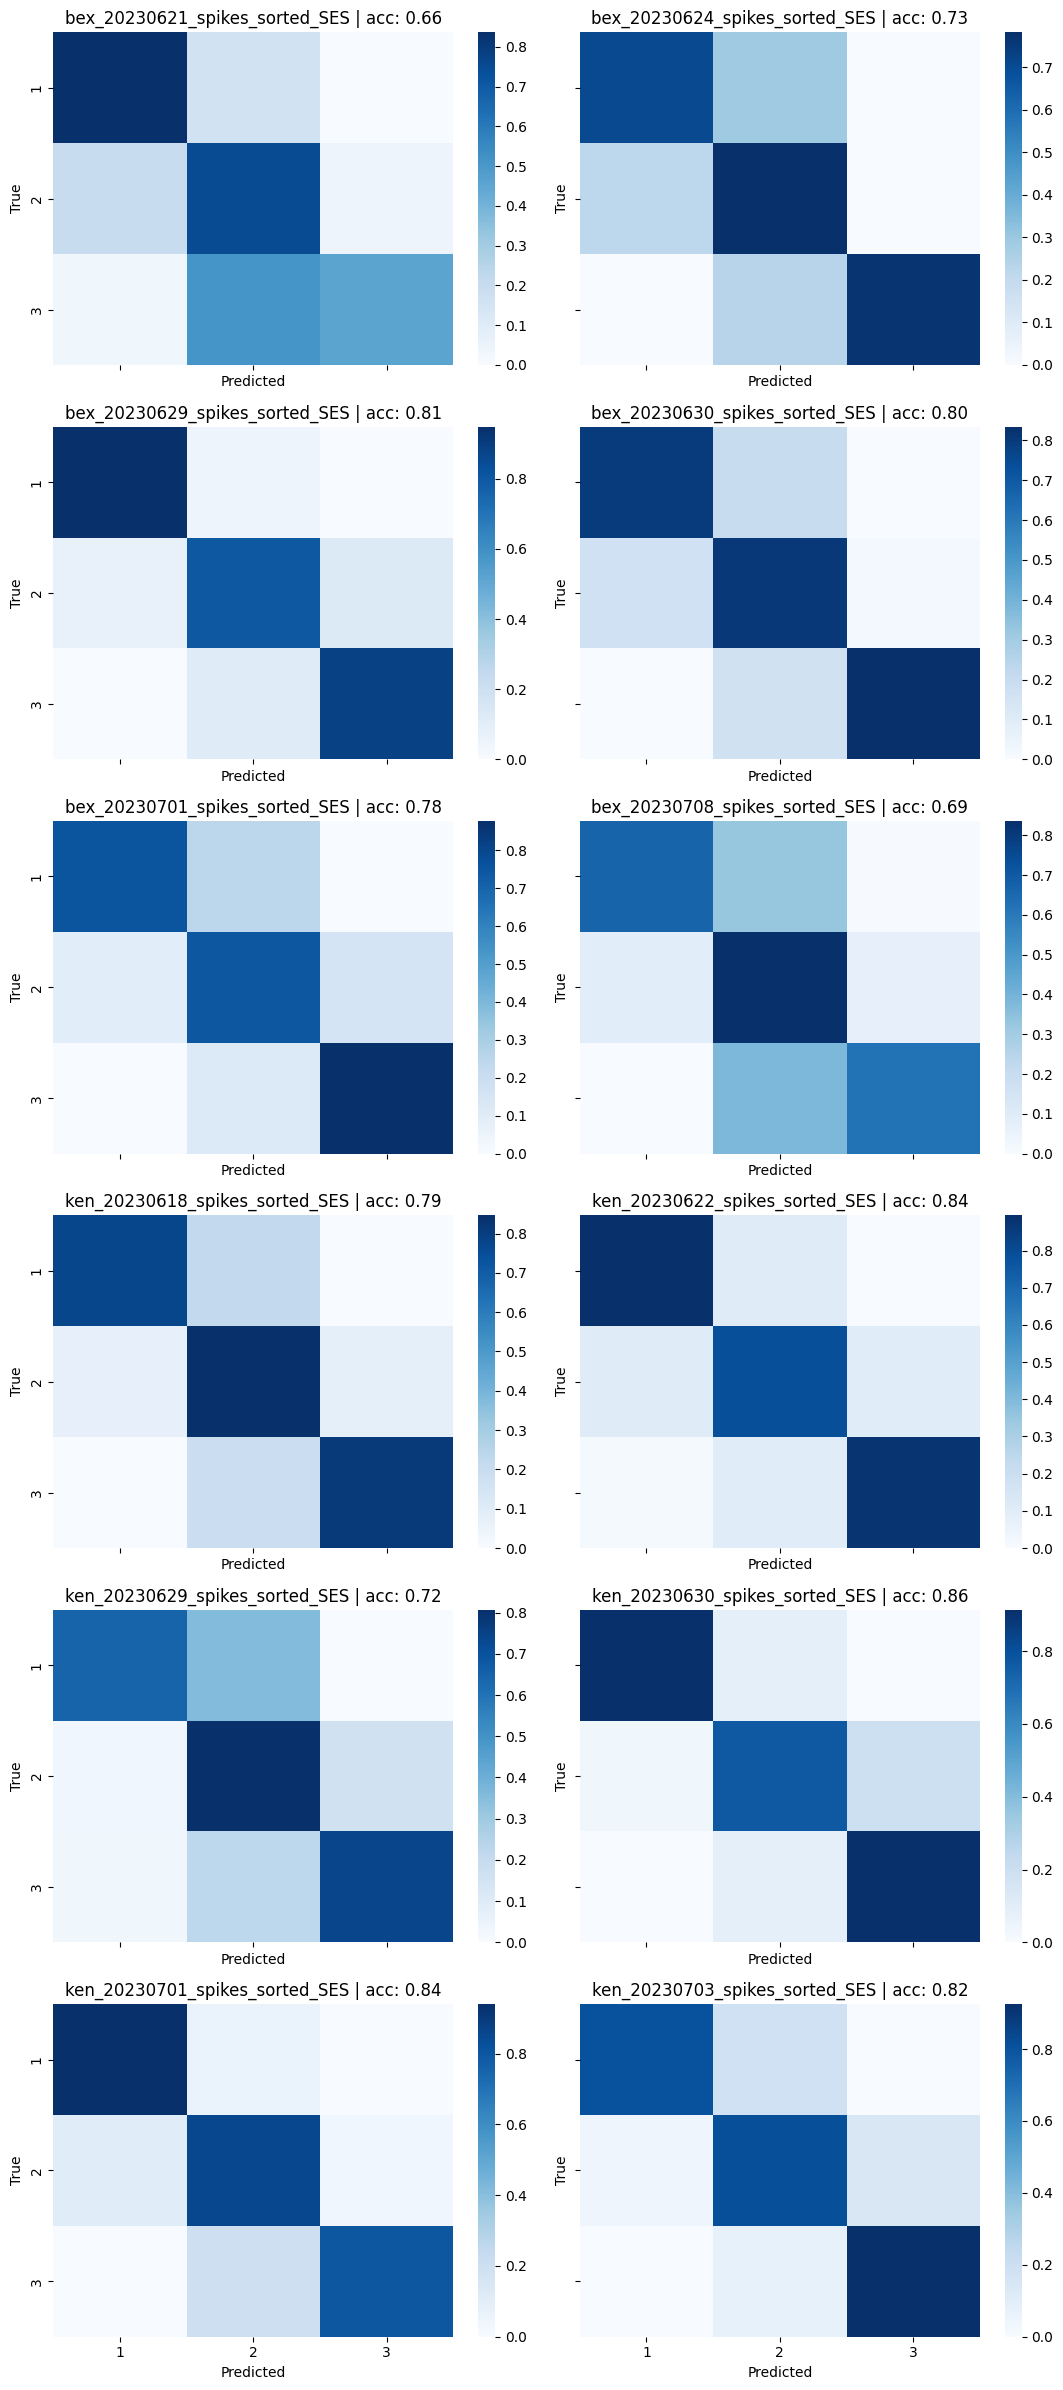

In [25]:
ml.plot.confusion_matrix(
    tiled_gts,
    tiled_preds,
    group="y",
    include_sitting=False,
    # concat=True,
)

In [ ]:
bex_gts = {
    session: gts for session, gts in eval_gts.items() if "bex" in session
}

bex_preds = {
    session: preds for session, preds in eval_preds.items() if "bex" in session
}

ml.plot.room_histogram2d(bex_gts, bex_preds, concat=True)

In [ ]:
bex_tiled_gts = {
    session: gt for session, gt in tiled_gts.items() if "bex" in session
}

bex_tiled_preds = {
    session: pred for session, pred in tiled_preds.items() if "bex" in session
}

ml.plot.confusion_matrix(
    bex_tiled_gts,
    bex_tiled_preds,
    group="y",
    include_sitting=False,
    concat=True,
)

In [ ]:
ken_gts = {
    session: gts for session, gts in eval_gts.items() if "ken" in session
}

ken_preds = {
    session: preds for session, preds in eval_preds.items() if "ken" in session
}

ml.plot.room_histogram2d(ken_gts, ken_preds, concat=True)

In [ ]:
ken_tiled_gts = {
    session: gt for session, gt in tiled_gts.items() if "ken" in session
}

ken_tiled_preds = {
    session: pred for session, pred in tiled_preds.items() if "ken" in session
}

ml.plot.confusion_matrix(
    ken_tiled_gts,
    ken_tiled_preds,
    group="y",
    include_sitting=False,
    concat=True,
)

In [ ]:
bex_ken_gts = {
    "bex": np.concatenate(list(bex_gts.values()), axis=0),
    "ken": np.concatenate(list(ken_gts.values()), axis=0),
}

bex_ken_preds = {
    "bex": np.concatenate(list(bex_preds.values()), axis=0),
    "ken": np.concatenate(list(ken_preds.values()), axis=0),
}

ml.plot.room_histogram2d(
    bex_ken_gts,
    bex_ken_preds,
    # save_path="plots/pose_to_position/histogram_trial_fc.svg",
)

In [ ]:
bex_ken_tiled_gts = {
    "bex": np.concatenate(list(bex_tiled_gts.values()), axis=0),
    "ken": np.concatenate(list(ken_tiled_gts.values()), axis=0),
}

bex_ken_tiled_preds = {
    "bex": np.concatenate(list(bex_tiled_preds.values()), axis=0),
    "ken": np.concatenate(list(ken_tiled_preds.values()), axis=0),
}

ml.plot.confusion_matrix(
    bex_ken_tiled_gts,
    bex_ken_tiled_preds,
    group="y",
    # include_sitting=True,
)

In [ ]:
tile_size = 0.865

gts = {
    "ideal": np.array(
        [
            [1 * tile_size, 0 * tile_size + tile_size / 2],
            [2 * tile_size, 0 * tile_size + tile_size / 2],
            [3 * tile_size, 0 * tile_size + tile_size / 2],
            [1 * tile_size, 1 * tile_size + tile_size / 2],
            [2 * tile_size, 1 * tile_size + tile_size / 2],
            [3 * tile_size, 1 * tile_size + tile_size / 2],
            [1 * tile_size, 2 * tile_size + tile_size / 2],
            [2 * tile_size, 2 * tile_size + tile_size / 2],
            [3 * tile_size, 2 * tile_size + tile_size / 2],
            [1 * tile_size, 3 * tile_size + tile_size / 2],
            [2 * tile_size, 3 * tile_size + tile_size / 2],
            [3 * tile_size, 3 * tile_size + tile_size / 2],
            [1 * tile_size, 4 * tile_size + tile_size / 2],
            [2 * tile_size, 4 * tile_size + tile_size / 2],
            [3 * tile_size, 4 * tile_size + tile_size / 2],
        ]
    )
}
preds = {
    "ideal": np.array(
        [
            [3 * tile_size, 0 * tile_size + tile_size / 2],
            [2 * tile_size, 0 * tile_size + tile_size / 2],
            [1 * tile_size, 0 * tile_size + tile_size / 2],
            [3 * tile_size, 3 * tile_size + tile_size / 2],
            [2 * tile_size, 3 * tile_size + tile_size / 2],
            [1 * tile_size, 3 * tile_size + tile_size / 2],
            [3 * tile_size, 2 * tile_size + tile_size / 2],
            [2 * tile_size, 2 * tile_size + tile_size / 2],
            [1 * tile_size, 2 * tile_size + tile_size / 2],
            [3 * tile_size, 1 * tile_size + tile_size / 2],
            [2 * tile_size, 1 * tile_size + tile_size / 2],
            [1 * tile_size, 1 * tile_size + tile_size / 2],
            [3 * tile_size, 4 * tile_size + tile_size / 2],
            [2 * tile_size, 4 * tile_size + tile_size / 2],
            [1 * tile_size, 4 * tile_size + tile_size / 2],
        ]
    )
}
ml.plot.room_histogram2d(
    gts,
    preds,
    save_path="plots/pose_to_position/histogram_homing_ideal.svg",
)

In [ ]:
ml.plot.confusion_matrix(
    eval_gts,
    eval_preds,
    # group="x",
    include_sitting=True,
    # save_path="plots/pose_to_position/confusion_matrix_nofilter_homing.svg",
)

In [ ]:
ml.room.plot(save_path="plots/pose_to_position/room.svg")